## Diver deeper into working with Datetime objects

## Why use Datetime object

Python provides an easy way to work with dates using datetime objects, and you can actually convert pandas dataframes columns containing dates and times as strings into datetime objects.

Recall that objects are used in Python to provide a set of functionality and rules that apply to that specific object type e.g.:
1. lists
2. numpy arrays
3. pandas dataframes and more

Just like these objects have distinct characteristics and functionality, the datetime object also provides unique functionality to help you to easily work with timeseries data and customise the dates on youor plot.

You will learn how to handle dates using datetime object wiht pandas, using a dataset of daily temperature (max in F) and total precipitation (inches) in July 2018 for Boulder, CO, provided by the NOAA.

### Import packages and get data

You will work with modules from pandas and matplotlib to plot dates more efficiently, and you will work with seaborn package to make more attractive plots.

In [4]:
import os
os.getcwd()

'C:\\Users\\s1526\\Dropbox\\Python_Tutorials\\Earth Data Analytics\\Python\\Intermediate\\1. Timeseries Data in Pandas'

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversion between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Download csv of temp (F) and precip (inches) in July 2018 for Boulder, CO
file_url = "https://ndownloader.figshare.com/files/12948515"
et.data.get_data(url=file_url)

# Set working directory
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

# Define relative path to file
file_path = os.path.join("data", "earthpy-downloads", "july-2018-temperature-precip.csv")

# Import file into pandas datafrmae
boulder_july_2018 = pd.read_csv(file_path)

In [6]:
# Display first few rows
boulder_july_2018.head()

date  max_temp  precip
0  2018-07-01        87    0.00
1  2018-07-02        92    0.00
2  2018-07-03        90 -999.00
3  2018-07-04        87    0.00
4  2018-07-05        84    0.24

### View Data Types in Pandas Dataframes

In [7]:
# View columns data types
boulder_july_2018.dtypes

date         object
max_temp      int64
precip      float64
dtype: object

The .dtyoes attribute indicates that the data columns in your pandas dataframe are stored as several different data types as follows:
- date as object: A string of characters that are in quotes.
- max_temp as int64 64 bit integer. This is a numeric value that will never contain decimal points.
- precip as float64 - 64 bit float: This data type accepts data that are a wide variety of numeric formats including decimals (floating point values) and integers. Numeric also accept larger numbers than int will.

Investigate the data type in the date column further to see the data type of closs of information it contains.

In [8]:
# Check data type of first value in date column
type(boulder_july_2018["date"][0])

str

### Plot Dates as Strings

To understand why using datetime objects can help you to create better plots, begin by creating a standard plot using matplotlib, based on the date column (as a string) and the max_temp column.

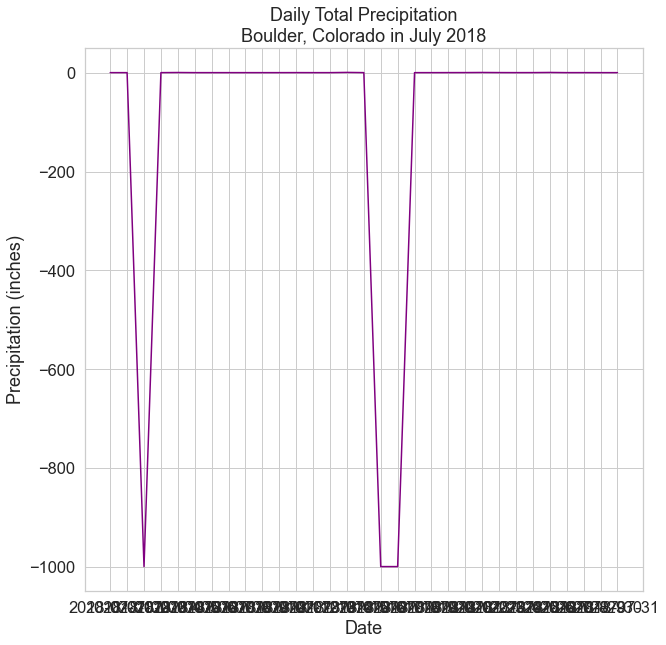

In [9]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(boulder_july_2018["date"],
       boulder_july_2018["precip"],
       color="purple")

# Set title and labels for axes
ax.set(xlabel="Date",
      ylabel="Precipitation (inches)",
      title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

First, you will notice that there are many negative values in this dataset - these are actually "no data" values that you will handle.

Look closely at the dates on teh x-axis. When you plot a string field for the x-axis, Python gets stuck trying to plot the all of the date labels. Each value is read as a string, and it is difficult to tray to fit all of those values on the x axis efficiently.

You can avoid this problem by converting the dates from strings to a datetime object during the import of data into pandas dataframe

## Import date column in pandas dataframe as datetime object

To import the dates as a datetime object, you can use the parse_dates parameter of the pd.read_csv() function that allows you to indicate that a particular column would be converted to a datetime object:

parse_dates = ["date_column"]

If you have a single column that contain dates in your data, you can also set dates as the index for the dataframe using the index_col parameter:

You will use this index in later lessons to allow you to quickly summarise and aggregate your data by date.

Now you can recreate the dataframe using the parameter parse_dates to convert the dates from strings to datetime values and index_col to set the index of the dataframe to the datetime values.

In [10]:
# Import data using datetime and set index to datetime
boulder_july_2018 = pd.read_csv(file_path,
                               parse_dates=["date"],
                               index_col=["date"])

boulder_july_2018.head()

max_temp  precip
date                        
2018-07-01        87    0.00
2018-07-02        92    0.00
2018-07-03        90 -999.00
2018-07-04        87    0.00
2018-07-05        84    0.24

Notice that during the import, you converted the column date to the type datetime and you also set the index of the dataframe as that datetime object.

So rather than the index being the original RangeIndex of values from 0 to 31, the index is now a DatetimeIndex.

In [11]:
# View dataframe info
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-07-01 to 2018-07-31
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max_temp  31 non-null     int64  
 1   precip    31 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 744.0 bytes


In [12]:
# View dataframe index
boulder_july_2018.index

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
               '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
               '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', name='date', freq=None)

## Plot dates form pandas dataframe using datetime

In matplotlib, there are slight differences in how bar and scatter plots read in data vs how line plots read in data.

When plotting with ax.bar() and ax.scatter(), numpy is used to concatenate an array that has been created and passed in for the x-axis and/or y-axis data. However numpy cannot concatenate the datetime object with other values.

Thus, if you try to pass a datetime column or index directly to ax.bar() or ax.scatter(), you will receive an error

### Use index values attribute to plot datetime

To avoid this error, you can call the attribute .values on the datetime index using:

df.index.values

Notice that here you use df.index to access the datetime column because you have assigned your date column to be an index for the dataframe.

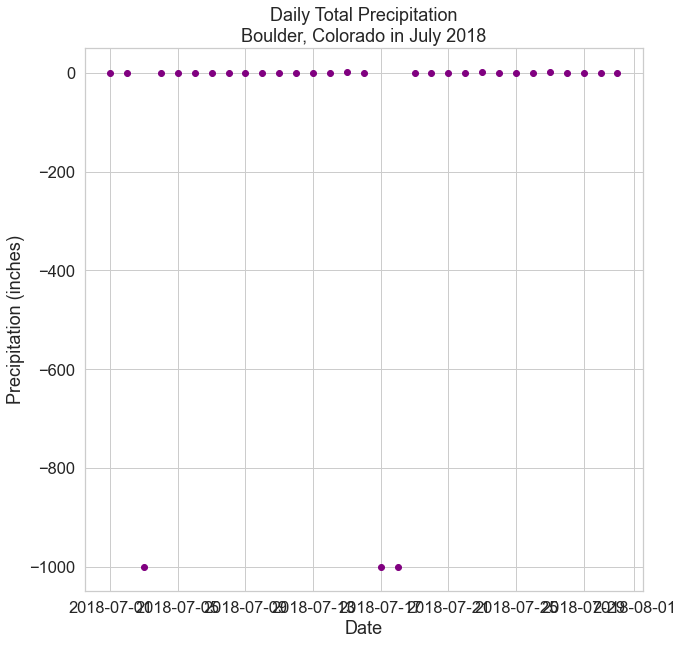

In [14]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values,
          boulder_july_2018["precip"],
          color="purple")

# Set title and labels for axes
ax.set(xlabel="Date",
      ylabel="Precipitation (inches)",
      title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

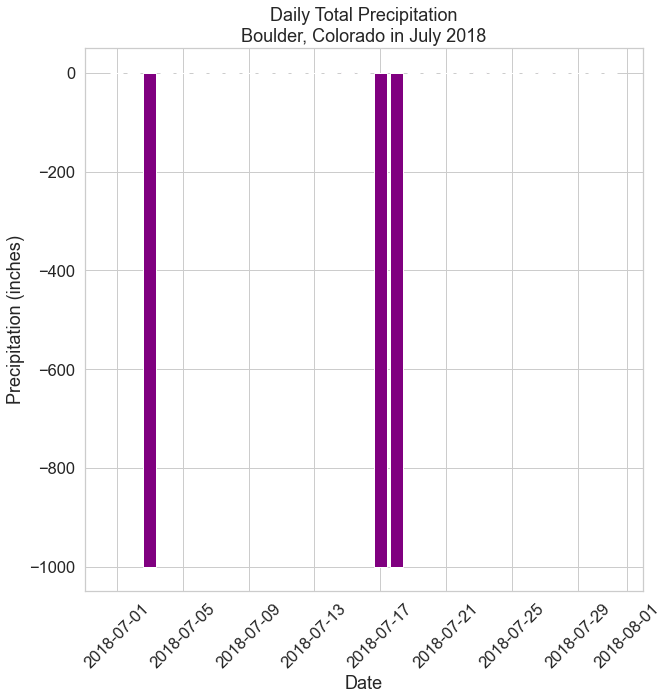

In [19]:
# Create figure and plot space+
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(boulder_july_2018.index.values,
       boulder_july_2018["precip"],
      color="purple")

# Set title and labels for axes
ax.set(xlabel="Date",
      ylabel="Precipitation (inches)",
      title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

Note: you do not need to use .values when using an index that contains float values, rather than datetime objects, nor when creating a line graph using ax.plot().

You will learn how to customise the date labels even more, such as displaying only month and day values or specifying the spacing for the time interval (i.e.frequency)

## Work with no data values in pandas dataframe

You likely noticed that there are many negative values in this dataset, which are actually "no data" values.

To account for data that are missing, you can put a value into those cell that represents "no data" to make it clear that these data are not usable for analysis or plotting.

Often, you'll find a dataset that uses a specific value for "no data". In many scientific disciplines, the value -999 is often used to indicate "no data" values.

The data in july-2018-temperature-precip.csv contains "no data" values in the precip column using the value -999.

If you do not specify that the value -999 is "no data" value, the values will be imported as real data, which will impact any stats, calcs, and plots using the data.

Explore the data using describe() to see the impact of reading in those -999 values as true values.

In [20]:
# Both min and mean are affected by these negative, no data values
boulder_july_2018.describe()

max_temp      precip
count  31.000000   31.000000
mean   88.129032  -96.618065
std     6.626925  300.256388
min    75.000000 -999.000000
25%    84.000000    0.000000
50%    88.000000    0.000000
75%    94.000000    0.050000
max    97.000000    0.450000

In [21]:
# Import data using datetime and no data value
boulder_july_2018 = pd.read_csv(file_path,
                               parse_dates=["date"],
                               index_col=["date"],
                               na_values=[-999])

boulder_july_2018.head()

max_temp  precip
date                        
2018-07-01        87    0.00
2018-07-02        92    0.00
2018-07-03        90     NaN
2018-07-04        87    0.00
2018-07-05        84    0.24

In [22]:
# Both min and mean now accurately reflect the true data
boulder_july_2018.describe()

max_temp     precip
count  31.000000  28.000000
mean   88.129032   0.065714
std     6.626925   0.120936
min    75.000000   0.000000
25%    84.000000   0.000000
50%    88.000000   0.000000
75%    94.000000   0.055000
max    97.000000   0.450000

Finally, plot the data one last time to see that the negative values -999 are no longer on the plot.

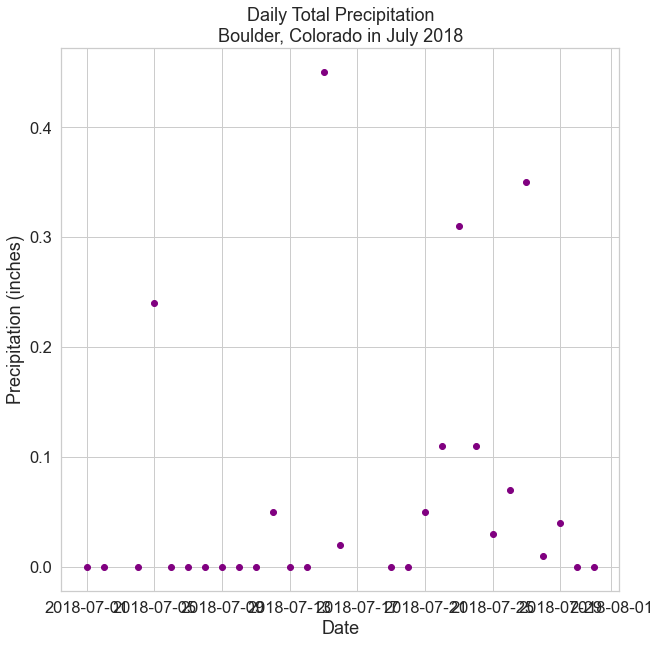

In [23]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(boulder_july_2018.index.values,
          boulder_july_2018["precip"],
          color="purple")

# Set title and labels for axes
ax.set(xlabel="Date",
      ylabel="Precipitation (inches)",
      title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

Note: if there are multiple types of missing values in your dataset, you can add multiple values in the na_values parameter as follows:

na_values=["NA", " ", -999]